<a href="https://colab.research.google.com/github/music-ai-644/AI_Study_2022/blob/main/Quiz/week2_1_sjj_%EC%88%98%EC%97%85%EC%8B%9C%EA%B0%84_%EC%88%98%EC%A0%95%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3 보조 자료 

## 자동차 연비 예측하기: 회귀 
1. 데이터셋 불러오기 

In [1]:
# 산점도 행렬을 그리기 위해 seaborn 패키지를 설치합니다
!pip install seaborn
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.8.2


In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [3]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
# MPG = 연비, Cylinders = 실린더 개수, Displacement = 배기량, Horseposer = 마력, Weight = 중량, Acceleration = 가속

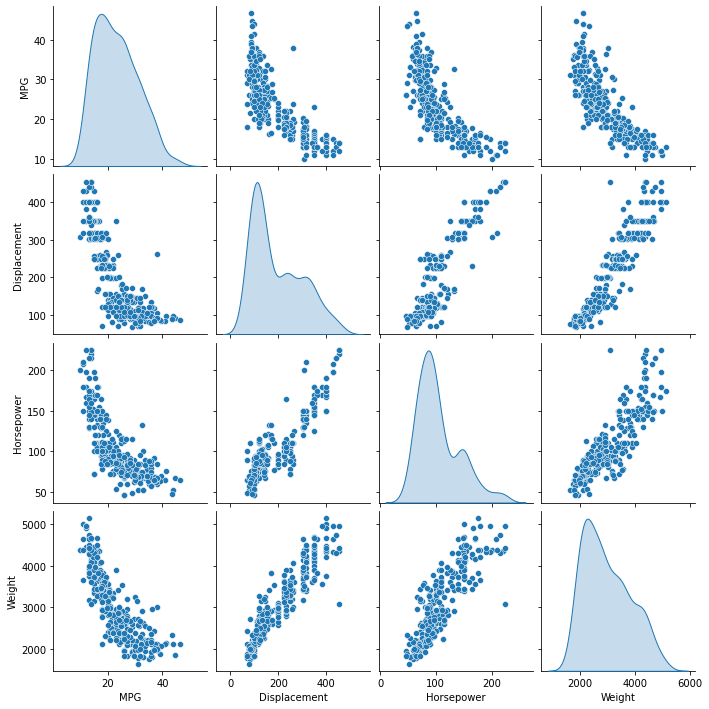

In [5]:
import numpy as np

np.random.seed(999)
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
sns.pairplot(train_dataset[["MPG", "Displacement", "Horsepower", "Weight"]], diag_kind="kde")

In [ ]:
# train set에서 연비(mpg)) - 배기량(displacement), 무게(weight) - 마력(horsepower) 간의 회귀분석을 수행하여 최적의 직선을 찾고 testset의 샘플로 연비로 배기량을, 무게로 마력을 예측하시오.

In [ ]:
# # MPG = train_dataset[:, 0]
# # Displacement = train_dataset[:, 2]
# # horsepower = train_dataset[:, 3]
# # weight = train_dataset[:, 4]

# MPG = train_dataset['MPG'].values
# Displacement = train_dataset['Displacement'].values
# Horsepower = train_dataset['Horsepower'].values
# Weight = train_dataset['Weight'].values

# # train_dataset
# print(Displacement)

In [6]:
mpg_train = train_dataset["MPG"]
displacement_train = train_dataset["Displacement"]
weight_train = train_dataset["Weight"]
horsepower_train = train_dataset["Horsepower"]


mpg_test = test_dataset["MPG"]
displacement_test = test_dataset["Displacement"]
weight_test = test_dataset["Weight"]
horsepower_test = test_dataset["Horsepower"]

print(mpg_train,mpg_test)

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64 9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: MPG, Length: 78, dtype: float64


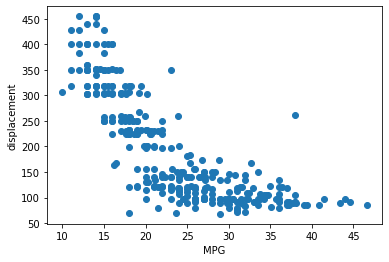

In [7]:
# MPG & Displacement 그래프

plt.scatter(mpg_train,displacement_train)
# plt.scatter(MPG, Displacement)
plt.xlabel("MPG")
plt.ylabel("displacement")
plt.show()

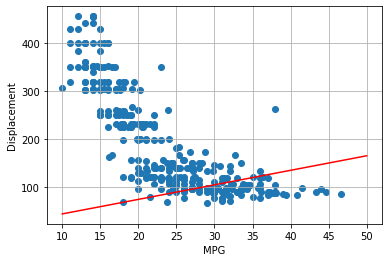

In [ ]:
w = 1
b = 1

x = mpg_train
y = displacement_train

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i 
  w = w + w_rate * err * 0.001
  b = b + 1 * err * 0.001

plt.scatter(x, y)
pt1 = (10, 10 * w + b)
pt2 = (50, 50 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('MPG')
plt.ylabel('Displacement')
plt.grid()
plt.show()

-11.821235686373747 442.6319557681924


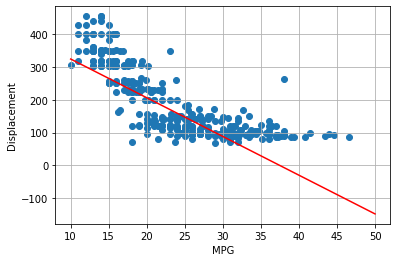

In [8]:
w = 1
b = 1


x = mpg_train
y = displacement_train

for i in range(1000):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i 
    w = w + w_rate * err * 0.001
    b = b + 1 * err * 0.001

print(w, b)
plt.scatter(x, y)
pt1 = (10, 10 * w + b)
pt2 = (50, 50 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('MPG')
plt.ylabel('Displacement')
plt.grid()
plt.show()

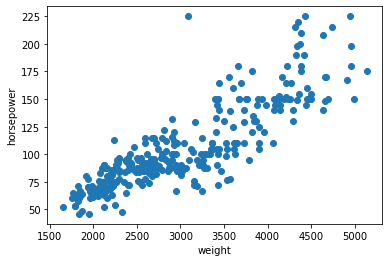

In [9]:
# weight & horsepower 그래프

plt.scatter(weight_train,horsepower_train)
plt.xlabel("weight")
plt.ylabel("horsepower")
plt.show()

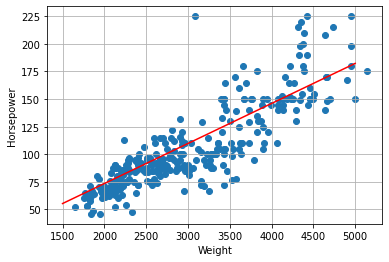

In [11]:
w = 1
b = 1


x = weight_train 
y = horsepower_train

for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i 
  w = w + w_rate * err * 1e-7
  b = b + 1 * err * 1e-7

plt.scatter(x, y)
pt1 = (1500, 1500 * w + b)
pt2 = (5000, 5000 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.grid()
plt.show()

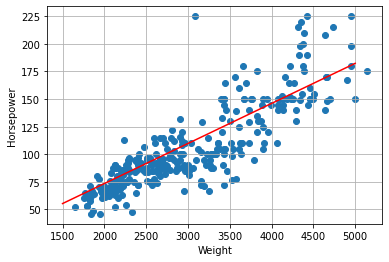

In [ ]:
w = 1
b = 1

x = weight_train 
y = horsepower_train

for i in range(1000):
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i 
    w = w + w_rate * err * 0.0000001
    b = b + 1 * err * 0.0000001

plt.scatter(x, y)
pt1 = (1500, 1500 * w + b)
pt2 = (5000, 5000 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.grid()
plt.show()
  



In [17]:
class Pearl:
    
    def __init__(self, w, b):
        self.w = w     # 가중치를 초기화합니다
        self.b = b     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err, lr):
        w_grad = x * err * lr   # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err * lr   # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=10000, lr=1e-3):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = y_i - y_hat      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err, lr)  # 역방향 계산
                self.w += w_grad          # 가중치 업데이트
                self.b += b_grad          # 절편 업데이트
        
    


In [18]:
x = mpg_test
y = displacement_test

x2 = weight_test
y2 = horsepower_test  

pearl_1 = Pearl(1., 1.)
# pearl_1 = Pearl(w=1., b=1.)
pearl_1.fit(x, y)

pearl_2 = Pearl(1., 1.)
pearl_2.fit(x2, y2, lr=1e-7)


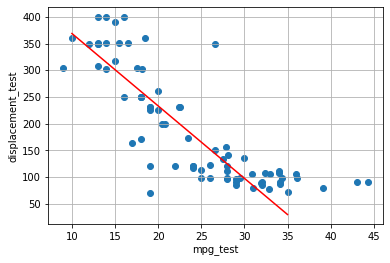

In [19]:
plt.scatter(x, y)

pt1 = (10, pearl_1.w * 10 + pearl_1.b)
pt2 = (35, pearl_1.w * 35 + pearl_1.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('mpg_test')
plt.ylabel('displacement_test')
plt.grid()
plt.show()

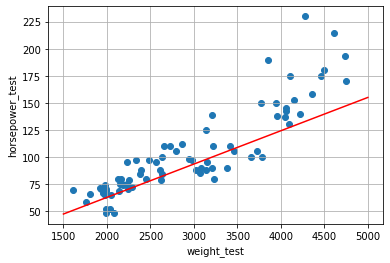

In [20]:
plt.scatter(x2, y2)

pt1 = (1500, pearl_2.w * 1500 + pearl_2.b)
pt2 = (5000, pearl_2.w * 5000 + pearl_2.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r')
plt.xlabel('weight_test')
plt.ylabel('horsepower_test')
plt.grid()
plt.show()

In [21]:
a = 10
pearl_1.forpass(a)

368.7558413099894

In [22]:
a = 15
pearl_2.forpass(a)

1.4396787246698983